# Filter ibtracs

In [2]:
%load_ext autoreload
%autoreload 2
import utils.main_utils as ut
import pandas as pd

In [3]:
min_year = 2000
hours = ["00", "06", "12", "18"]

ut.filter_tracks(min_year=min_year, hours=hours)

Number of TCs: 2410
Number of TCs: 2191


KeyboardInterrupt: 

In [1]:
import pandas as pd
df_path = "/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/ERA5/TC_track_filtered_1980_00_06_12_18.csv"

df = pd.read_csv(df_path, na_filter=False, dtype="string")
len(df[df["SEASON"].isin(["2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008"])]["SID"].unique())

852

In [14]:
import pickle

with open("/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/ERA5/valid_dates_1980_00_06_12_18.pkl", "rb") as fi:
    valid_dates = pickle.load(fi)
valid_dates["2000"]["06"] #6, 11 # 5

['01',
 '06',
 '07',
 '08',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25']

# Write params

In [ ]:
# write 6 months of data into input params

ut.write_params_for_period(output_path="/users/lpoulain/louis/TCBench_0.1/input_params/", start_date="20200301", end_date="20200831", max_lead=168, step=12, debug=False)

In [1]:
%load_ext autoreload
%autoreload 2

import scripts.utils as ut
import pandas as pd
tc_id = "2005236N23285"
#tc_id = "2000185N15117"
path = "/users/lpoulain/louis/TCBench_0.1/input_params"
df = pd.read_csv("/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/ERA5/TC_track_filtered_1980_00_06_12_18.csv",
                 dtype="string", na_filter=False)
ut.write_params_for_tc(f"{path}/{2005}/", df, TC_id=tc_id, season="2005", step=6, max_lead=6, debug=False)

In [ ]:
# take one tc/basin for several seasons and writes params

%load_ext autoreload
%autoreload 2
import scripts.utils as ut

seasons = ["2008", "2023"]	
ut.write_several_seasons(output_path=f"./input_params/", seasons=seasons, step=6, max_lead=168, 
                          ibtracs_path='/work/FAC/FGSE/IDYST/tbeucler/default/milton/repos/alpha_bench/tracks/ibtracs/ibtracs.ALL.list.v04r00.csv',
                          as_range=True)

# Distance calculator

In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import sys, os
import utils.main_utils as ut

df_path = "/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/ERA5/TC_track_filtered_1980_00_06_12_18.csv"
step = 168
mode = "deg"
max_dist = ut.max_historical_distance_within_step(df_path=df_path, mode=mode, step=step, start=2000)

1/2191
219/2191
438/2191
657/2191
876/2191
1095/2191
1314/2191
1533/2191
1752/2191
1971/2191
2190/2191
Max dists on a 168h period:
 Overall dist: 6746.6063104869345km (TC 2004260N11331, idx (18, 46)).
 Max lon dist: 78.9deg
 Max lat dist: 47.5deg


Text(0.5, 1.0, 'Distribution of distances traveled by TCs during a week\nMax: 7968.636 km, Mean: 1343.627 km, Std: 896.347 km')

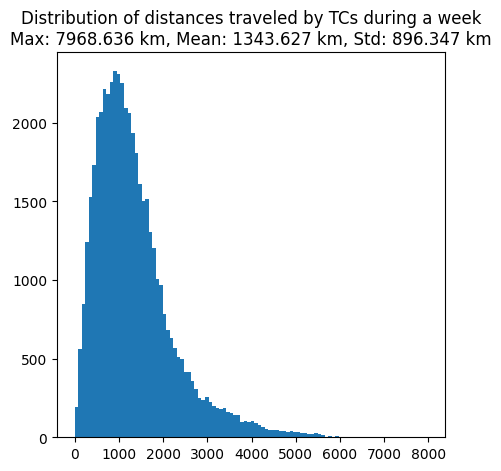

In [10]:
import numpy as np
import matplotlib.pyplot as plt
"""
d6 = np.load("./6h_dists.npy")
print(np.mean(d), np.std(d))
print([np.count_nonzero(d>dmax) for dmax in [400, 600, 800, 1000, 1200, 1400]])
plt.figure()
_, _, _ = plt.hist(d[d>400], bins=100)
"""	
d168 = np.load("./168h_dists.npy")
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
_, _, _ = ax.hist(d168, bins=100)
ax.set_title("Distribution of distances traveled by TCs during a week"+\
    f"\nMax: {np.max(d168):.3f} km, Mean: {np.mean(d168):.3f} km, Std: {np.std(d168):.3f} km")

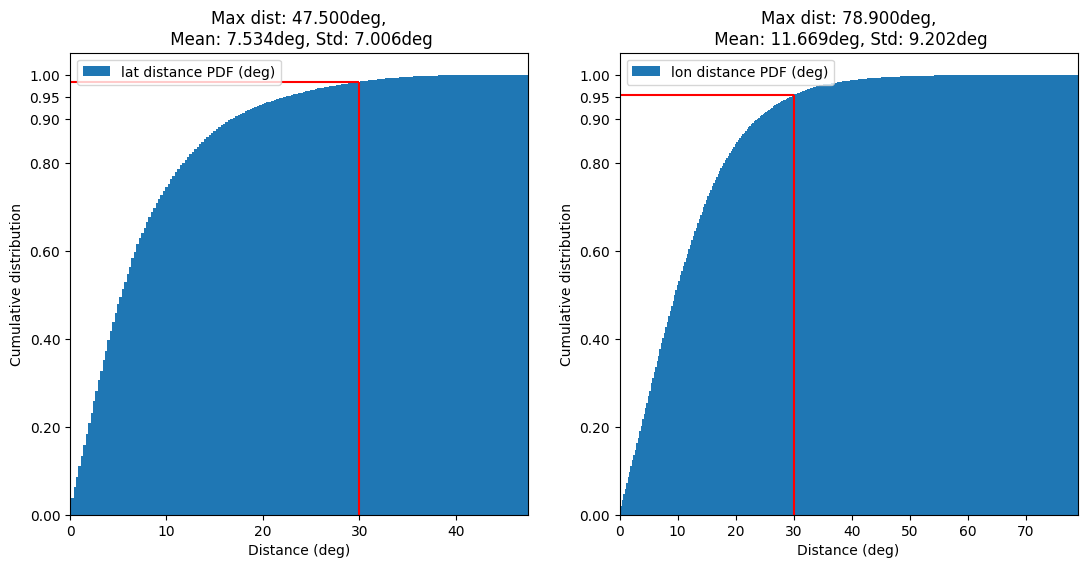

In [15]:
import numpy as np
import matplotlib.pyplot as plt

r = 0.25
mode = 'deg'
start = '2000'
d168_lat = np.load(f"./168h_dists_lats_{mode}_{start}.npy")
d168_lon = np.load(f"./168h_dists_lons_{mode}_{start}.npy")
bins_lat = np.arange(-r/2, d168_lat.max()+r, r)
bins_lon = np.arange(-r/2, d168_lon.max()+r, r)

ticks = [0, 0.2, 0.4, 0.6, 0.8, 0.9, 0.95, 1]
fig, axs = plt.subplots(1, 2, figsize=(13, 6))
ax1, ax2 = axs
n, e, _ = ax1.hist(d168_lat, bins=bins_lat, label=f"lat distance PDF ({mode})", weights=np.ones(len(d168_lat))/len(d168_lat), cumulative=True)
freq_30 = n[e[:-1]==30-r/2]

ax1.vlines(30, ymin=0, ymax=freq_30, color="r")
ax1.hlines(freq_30, xmin=0, xmax=30, color="r")
ax1.set_title(f"Max dist: {d168_lat.max():.3f}{mode},\n Mean: {np.mean(d168_lat):.3f}{mode}, Std: {np.std(d168_lat):.3f}{mode}")
ax1.set_xlabel(f"Distance ({mode})")
ax1.set_ylabel("Cumulative distribution")
ax1.set_xlim(0, d168_lat.max())
ax1.set_yticks(ticks) # Set yticks
ax1.legend()

n, e, _ = ax2.hist(d168_lon, bins=bins_lon, label=f"lon distance PDF ({mode})", weights=np.ones(len(d168_lon))/len(d168_lon), cumulative=True)
freq_30 = n[e[:-1]==30-r/2]
ax2.vlines(30, ymin=0, ymax=freq_30, color="r")
ax2.hlines(freq_30, xmin=0, xmax=30, color="r")
ax2.set_xlabel(f"Distance ({mode})")
ax2.set_ylabel("Cumulative distribution")
ax2.set_xlim(0, d168_lon.max())
ax2.set_yticks(ticks) # Set yticks
ax2.legend()
ax2.set_title(f"Max dist: {d168_lon.max():.3f}{mode},\n Mean: {np.mean(d168_lon):.3f}{mode}, Std: {np.std(d168_lon):.3f}{mode}")

fig.savefig(f"./168h_dists_lats_lons_{mode}_{start}.png", bbox_inches="tight")

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

ds = xr.open_dataset("/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/graphcast/graphcast_1999-12-09T00_to_1999-12-16T00_ldt_168_1999343S09095_small.nc")
ds

<xarray.Dataset>
Dimensions:        (time: 28, lat: 241, lon: 241, isobaricInhPa: 13)
Coordinates:
  * time           (time) timedelta64[ns] 0 days 06:00:00 ... 7 days 00:00:00
  * lon            (lon) float64 65.25 65.5 65.75 66.0 ... 124.8 125.0 125.2
  * lat            (lat) float64 -39.0 -38.75 -38.5 -38.25 ... 20.5 20.75 21.0
  * isobaricInhPa  (isobaricInhPa) float64 50.0 100.0 150.0 ... 925.0 1e+03
Data variables:
    u10            (time, lat, lon) float32 ...
    v10            (time, lat, lon) float32 ...
    t2m            (time, lat, lon) float32 ...
    z              (time, isobaricInhPa, lat, lon) float32 ...
    msl            (time, lat, lon) float32 ...
    q              (time, isobaricInhPa, lat, lon) float32 ...
    t              (time, isobaricInhPa, lat, lon) float32 ...
    tp             (time, lat, lon) float32 ...
    u              (time, isobaricInhPa, lat, lon) float32 ...
    v              (time, isobaricInhPa, lat, lon) float32 ...
    w              (time, isobaricInhPa, lat, lon) float32 ...

In [1]:
"key".split('_')[0]

'key'

In [7]:
import pandas as pd

df = pd.read_csv("/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/ERA5/TC_track_filtered_1980_00_06_12_18.csv", dtype="string", na_filter=False)
df[df["SID"]=="2000031S11074"].iloc[[0,1,2,3,4,5,6,7,-7,-6,-5,-4,-3,-2,-1]][["ISO_TIME", "USA_WIND", "MLC_PRES"]]

,ISO_TIME,USA_WIND,MLC_PRES
64830,2000-01-30 18:00:00,20,
64831,2000-01-31 00:00:00,20,
64832,2000-01-31 06:00:00,25,
64833,2000-01-31 12:00:00,25,
64834,2000-01-31 18:00:00,25,
64835,2000-02-01 00:00:00,30,
64836,2000-02-01 06:00:00,25,
64837,2000-02-01 12:00:00,25,
64853,2000-02-05 12:00:00,,
64854,2000-02-05 18:00:00,,


In [15]:
df[df["SID"]=="1999343S09095"].iloc[[0,27, -2, -1]][["ISO_TIME","USA_WIND", "BOM_PRES"]]

,ISO_TIME,USA_WIND,BOM_PRES
64514,1999-12-09 00:00:00,,
64541,1999-12-15 18:00:00,60,992
64547,1999-12-17 06:00:00,35,994
64548,1999-12-17 12:00:00,30,


# Combine predictions

## OLD COMBINE

In [ ]:
%load_ext autoreload
%autoreload 2
import scripts.utils as ut

ut.combine_in_series(output_path="/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/",
                    model_name="graphcast", remove_old=True, start_in="2008-09-29")

In [30]:
%load_ext autoreload
%autoreload 2
import scripts.utils as ut

path = "/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/"
model_name = "fourcastnetv2"
years = ["2007", "2008", "2009", "2010", "2011", "2019", "2020"]

ut.fast_rename(path, model_name, years=years)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## "Rename" with TC_id

In [4]:
%load_ext autoreload
%autoreload 2
import scripts.utils as ut

model = "graphcast"

ut.renaming(folder_name="/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/",
                    model=model, remove_old=False, cut=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/graphcast/graphcast_2000-03-10T00_to_2000-03-14T00_ldt_96.nc
1/1: 2000-03-10T00 to 2000-03-14T00
Model: graphcast

2000-03-10T00 to 2000-03-14T00 (96h) - 1/1
!!! Removing 1 old files !!! 15s to STOP if this is a mistake


# Save small regions

In [ ]:
"""from scripts import utils as ut
import pandas as pd
import xarray as xr
import numpy as np
%load_ext autoreload
%autoreload 2

ds_path = "/scratch/lpoulain/panguweather/pangu_d_20180913_t_0600_lt_6-144h.nc"
path = "/work/FAC/FGSE/IDYST/tbeucler/default/milton/repos/alpha_bench/tracks/ibtracs/"
ibtracs_df = pd.read_csv(path + 'ibtracs.ALL.list.v04r00.csv', dtype="string").loc[1:]"""

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
#ut.cut_and_save_rect(ds_folder="/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/",
#                     date_start="2019-11-22T00", date_end="2019-11-29T00", lead_time=168, df_tracks=ibtracs_df, 
#                     output_path="/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/",
#                     tc_id="2019326S08163")

In [2]:
from scripts import utils as ut
import xarray as xr
import glob
%load_ext autoreload
%autoreload 2
ds_folder = "/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/"
output_path = "/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/"
ut.cut_save_in_series(ds_folder=ds_folder, models=["graphcast"],
                      output_path=output_path, parallel=False, remove=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Model: graphcast

2000-02-25T06 to 2000-03-03T06 (168h) - 25/626
2000-02-25T12 to 2000-02-26T12 (24h) - 26/626
2000-02-25T12 to 2000-02-26T12 (24h) - 27/626
2000-02-25T12 to 2000-02-26T12 (24h) - 28/626
2000-02-25T12 to 2000-02-26T12 (24h) - 29/626
2000-02-25T12 to 2000-02-29T12 (96h) - 30/626
2000-02-25T12 to 2000-02-29T12 (96h) - 31/626
2000-02-25T12 to 2000-02-29T12 (96h) - 32/626
2000-02-25T12 to 2000-03-03T00 (156h) - 33/626
2000-02-25T12 to 2000-03-03T00 (156h) - 34/626
2000-02-25T12 to 2000-03-03T12 (168h) - 35/626
2000-02-25T18 to 2000-02-26T12 (18h) - 36/626
2000-02-25T18 to 2000-02-26T12 (18h) - 37/626
2000-02-25T18 to 2000-02-26T12 (18h) - 38/626
2000-02-25T18 to 2000-02-26T12 (18h) - 39/626
2000-02-25T18 to 2000-02-29T12 (90h) - 40/626
2000-02-25T18 to 2000-02-29T12 (90h) - 41/626
2000-02-25T18 to 2000-02-29T12 (90h) - 42/626
2000-02-25T18 to 2000-03-03T00 (150h) - 43/626
2000-02-25T18 t

In [3]:
xr.open_dataset('/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/panguweather/pangu_2002-01-25T12_to_2002-01-28T12_ldt_72_2002017S07078_small.nc')

OSError: [Errno -101] NetCDF: HDF error: '/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/panguweather/pangu_2002-01-25T12_to_2002-01-28T12_ldt_72_2002017S07078_small.nc'

In [15]:
import xarray as xr
import numpy as np
ds = xr.open_dataset("/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/graphcast/graphcast_2008-03-26T18_to_2008-03-31T12_ldt_114_2008079S12069_small.nc")
ds2 = xr.open_dataset("/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/graphcast/graphcast_2008-03-26T18_to_2008-03-31T12_ldt_114_2008079S12069.nc")
ds2_tmp = ds2.sel(latitude=slice(ds.latitude.max(), ds.latitude.min()), longitude=slice(ds.longitude.min(), ds.longitude.max()))
for var in ds.data_vars:
    print(var, np.count_nonzero(ds[var].values!=ds2_tmp[var].values))

t2m 58081
msl 58081
t 755053
z 755053
u 755053
v 755053
w 755053
q 755053
heightAboveGround 0
u10 0
v10 0
surface 0
tp 1045458


In [9]:
ds2_tmp

<xarray.Dataset>
Dimensions:            (time: 19, latitude: 241, longitude: 241,
                        isobaricInhPa: 13)
Coordinates:
  * time               (time) datetime64[ns] 2008-03-27 ... 2008-03-31T12:00:00
  * latitude           (latitude) float64 30.0 29.75 29.5 ... -29.5 -29.75 -30.0
  * longitude          (longitude) float64 38.5 38.75 39.0 ... 98.0 98.25 98.5
  * isobaricInhPa      (isobaricInhPa) float64 1e+03 925.0 850.0 ... 100.0 50.0
Data variables: (12/13)
    t2m                (time, latitude, longitude) float32 287.6 288.0 ... 293.2
    msl                (time, latitude, longitude) float32 1.009e+05 ... 1.01...
    t                  (time, isobaricInhPa, latitude, longitude) float32 291...
    z                  (time, isobaricInhPa, latitude, longitude) float32 725...
    u                  (time, isobaricInhPa, latitude, longitude) float32 3.5...
    v                  (time, isobaricInhPa, latitude, longitude) float32 -5....
    ...                 ...
    q                  (time, isobaricInhPa, latitude, longitude) float32 0.0...
    heightAboveGround  float64 10.0
    u10                (time, latitude, longitude) float32 3.504 ... -4.337
    v10                (time, latitude, longitude) float32 -5.559 ... 4.299
    surface            float64 0.0
    tp                 (time, latitude, longitude) float32 nan nan ... nan nan
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2023-12-28T15:57 GRIB to CDM+CF via cfgrib-0.9.1...

In [7]:
ds

<xarray.Dataset>
Dimensions:            (time: 19, latitude: 241, longitude: 241,
                        isobaricInhPa: 13)
Coordinates:
  * time               (time) datetime64[ns] 2008-03-27 ... 2008-03-31T12:00:00
  * latitude           (latitude) float64 30.0 29.75 29.5 ... -29.5 -29.75 -30.0
  * longitude          (longitude) float64 38.5 38.75 39.0 ... 98.0 98.25 98.5
  * isobaricInhPa      (isobaricInhPa) float64 1e+03 925.0 850.0 ... 100.0 50.0
Data variables: (12/13)
    t2m                (time, latitude, longitude) float32 287.6 288.0 ... 293.2
    msl                (time, latitude, longitude) float32 ...
    t                  (time, isobaricInhPa, latitude, longitude) float32 ...
    z                  (time, isobaricInhPa, latitude, longitude) float32 ...
    u                  (time, isobaricInhPa, latitude, longitude) float32 ...
    v                  (time, isobaricInhPa, latitude, longitude) float32 ...
    ...                 ...
    q                  (time, isobaricInhPa, latitude, longitude) float32 ...
    heightAboveGround  float64 ...
    u10                (time, latitude, longitude) float32 ...
    v10                (time, latitude, longitude) float32 ...
    surface            float64 ...
    tp                 (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2023-12-28T15:57 GRIB to CDM+CF via cfgrib-0.9.1...

# Create Dataset

In [1]:
from dataset import create_dataset
from scripts import utils as ut
import xarray as xr
import numpy as np
import pandas as pd
import glob
%load_ext autoreload
%autoreload 2

df_tracks = pd.read_csv("/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/ERA5/TC_track_filtered_1980_00_06_12_18.csv", 
                        dtype="string", na_filter=False)

In [2]:
model = "graphcast"
model_folder = "panguweather" if model=="pangu" else model
tc_ids = np.unique([ut.get_tc_id_nc(file) for file in glob.glob(f"/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/{model_folder}/{model}*_small.nc")])
print(tc_ids)

['1999343S09095' '1999343S11123' '1999348N12115' '1999357S08076'
 '2000003S13082' '2000006S15164' '2000019S11127' '2000023S15172'
 '2000024S12100' '2000025S15056' '2000031S11074' '2000032S11116'
 '2000050S13078' '2000055S23227' '2000056S17152' '2000058S14063'
 '2000060S12086' '2000060S17123' '2000064S19209' '2000067S15189'
 '2000075S17119' '2000083S17102' '2000089S20168' '2000091S14156'
 '2000102S13128' '2000105S09127' '2000125N06136' '2000139N18122'
 '2000141N18116' '2000141N24130' '2000142N12262' '2000150N11117'
 '2000160N21267' '2000164N12256' '2000170N10268' '2000175N09340'
 '2000184N13133' '2000185N15117' '2000187N12245' '2000193N10131'
 '2000196N16122' '2000199N20145' '2000201N11224' '2000202N12131'
 '2000203N17249' '2000205N10260' '2000206N11266' '2000209N06182'
 '2000214N22155' '2000214S06080' '2000215N15254' '2000217N11342'
 '2000217N12260' '2000220N24149' '2000222N14143' '2000222N28286'
 '2000223N18257' '2000226N16258' '2000227N23267' '2000228N31180'
 '2000230N08139' '2000230

In [3]:
tc_ids = [tc_id for tc_id in tc_ids if int(tc_id[:4])<2006]

In [4]:
vars = {"msl":[0], "u10":[0], "v10":[0]}
create_dataset(data_folder="/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/", model_name=model, 
                       tc_ids=tc_ids, df_tracks=df_tracks, vars=vars, size=241)

['msl', 'u10', 'v10']


# Tests

In [2]:
import xarray as xr

ds = xr.open_dataset("/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/fourcastnetv2/fourcastnetv2_2000-02-06T00_to_2000-02-13T00_ldt_168.nc")
ds2 = xr.open_dataset("/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/fourcastnetv2/fcnv2_2000-01-15T00_to_2000-01-15T12_ldt_12.nc")
ds.lat[0], ds.lon[0], ds2.lat[0], ds2.lon[0]

(<xarray.DataArray 'lat' ()>
 array(90.)
 Coordinates:
     lat      float64 90.0,
 <xarray.DataArray 'lon' ()>
 array(0.)
 Coordinates:
     lon      float64 0.0,
 <xarray.DataArray 'lat' ()>
 array(90.)
 Coordinates:
     lat      float64 90.0,
 <xarray.DataArray 'lon' ()>
 array(0.)
 Coordinates:
     lon      float64 0.0)

ai-models --assets ../fourcastnetv2/ --date 20000206 --time 0000 --lead-time 168 --input file --file "/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/ERA5/ERA5_2000_02" --path test fourcastnetv2-small

In [59]:
def compare_e2mip_ecmwf(var='u', lat_coord=0, lon_coord=0, time_coord=0, level='0', e2mip_file='', ecmwf_file=''):
    import xarray as xr
    
    ds_e2mip = xr.open_dataset(e2mip_file)
    ds_ecmwf = xr.open_dataset(ecmwf_file)
    var_print = var+level
    if level[-1]=='m' and var in ['u', 'v']:
        var_ecmwf = var+level[:-1]
        
        val_ecmwf = ds_ecmwf[var_ecmwf].values[time_coord].min()#, lat_coord, lon_coord]
        val_ecmwf2 = ds_ecmwf[var_ecmwf].values[time_coord].max()#, -lat_coord-1, -lon_coord-1]
        val_ecmwf3 = ds_ecmwf[var_ecmwf].values[time_coord].mean()#, lat_coord, lon_coord]
    else:
        if level[-1]=='m' and var=='t':
            var_ecmwf = var+level
            val_ecmwf = ds_ecmwf[var_ecmwf].values[time_coord].min()#, lat_coord, lon_coord]
            val_ecmwf2 = ds_ecmwf[var_ecmwf].values[time_coord].max()#, -lat_coord-1, -lon_coord-1]
            val_ecmwf3 = ds_ecmwf[var_ecmwf].values[time_coord].mean()#, lat_coord, lon_coord]
        else:
            var_ecmwf = var
            lev_ecmwf = list(ds_ecmwf["isobaricInhPa"].values).index(float(level))
            val_ecmwf = ds_ecmwf[var_ecmwf].values[time_coord, -lev_ecmwf-1].min()#, lev_ecmwf, lat_coord-1, lon_coord]
            val_ecmwf2 = ds_ecmwf[var_ecmwf].values[time_coord, -lev_ecmwf-1].max()#, -lev_ecmwf-1, -lat_coord, -lon_coord-1]
            val_ecmwf3 = ds_ecmwf[var_ecmwf].values[time_coord, -lev_ecmwf-1].mean()#, lev_ecmwf, lat_coord-1, lon_coord]
    
    var_e2mip = var+level
    lev_e2mip = list(ds_e2mip.channel.values).index(var_e2mip)
    val_e2mip = ds_e2mip['__xarray_dataarray_variable__'].values[time_coord+1, 0, lev_e2mip].min()#, 0, lev_e2mip, lat_coord, lon_coord]
    val_e2mip2 = ds_e2mip['__xarray_dataarray_variable__'].values[time_coord+1, 0, lev_e2mip].max()#, 0, -lev_e2mip-1, -lat_coord-1, -lon_coord-1]
    val_e2mip3 = ds_e2mip['__xarray_dataarray_variable__'].values[time_coord+1, 0, lev_e2mip].mean()#, 0, lev_e2mip, lat_coord, lon_coord]
    
    print(f"earth2mip min value for var {var_e2mip} at timestep {time_coord+1}: {val_e2mip}")
    print(f"ecmwf min value for var {var_print} at timestep {time_coord}: {val_ecmwf}")
    print(f"earth2mip max value for var {var_e2mip} at timestep {time_coord+1}: {val_e2mip2}")
    print(f"ecmwf max value for var {var_print} at timestep {time_coord}: {val_ecmwf2}")
    print(f"earth2mip mean value for var {var_e2mip} at timestep {time_coord+1}: {val_e2mip3}")
    print(f"ecmwf mean value for var {var_print} at timestep {time_coord}: {val_ecmwf3}")

In [68]:
import xarray as xr
import subprocess
var = 'r'
level = '1000'
lat = 0
lon = 0
time  = 1
file_e2mip = "/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/fourcastnetv2/fourcastnetv2_2000-02-06T00_to_2000-02-13T00_ldt_168.nc"
file_ecmwf = "/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/fourcastnetv2/fcnv2_2000-02-06T00_to_2000-02-13T00_ldt_18.grib"
if file_ecmwf[-4:]=='grib':
    subprocess.run(["bash", "-c", f"module load gcc proj cdo && cdo -R remapcon,r1440x721 -setgridtype,regular {file_ecmwf} {file_ecmwf[-4:]+'new.grib'}"])
    subprocess.run(["bash", "-c", f"rm {file_ecmwf}"])
#compare_e2mip_ecmwf(var=var, level=level, lat_coord=lat, lon_coord=lon, time_coord=time, 
#                    e2mip_file=file_e2mip, ecmwf_file=file_ecmwf)

cdo(1) setgridtype (Warning): No reduced Gaussian grid found!
Warning (gribapiDecode): Conversion of gaussian reduced grids unsupported!


cdo(1) setgridtype: Process started
cdo    remapcon: YAC first order conservative weights from lonlat (1440x721) to lonlat (1440x721) grid
cdo(1) setgridtype: Processed 75791520 values from 13 variables over 1 timestep.
cdo    remapcon: Processed 75791520 values from 13 variables over 1 timestep [12.23s 34GB].


In [10]:
import numpy as np

r = np.load("/users/lpoulain/louis/plots/xgboost/Constants/norma_cst_graphcast_6h_all_2000_2001_2003_2004_2005_2006_jsdiv_min_max_mean_std_q1_median_q3_iqr_skew_kurtosis.npy")[:2, 1:5]
a = np.array([1,2,3,4]).reshape(-1,1)
print(a.shape, r.shape)
a = (a-r[0])/r[1]
a, a.shape

(4, 1) (2, 4)


(array([[-4.58416561, -3.68181359, -2.9485849 , -1.72410097],
        [-4.23251521, -2.39833318, -0.73288747, -0.13860777],
        [-3.88086481, -1.11485278,  1.48280995,  1.44688542],
        [-3.52921441,  0.16862763,  3.69850738,  3.03237861]]),
 (4, 4))

In [11]:
def test(a):
    a["c"] = 3
    return a
    
a = {}
test(a), a


({'c': 3}, {'c': 3})

In [10]:
import xarray as xr

ds = xr.load_dataset("/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/fourcastnetv2/fourcastnetv2_2005-08-24T18_to_2005-08-31T06_ldt_156_2005230N20144_small.nc")
ds['__xarray_dataarray_variable__'].values[0, 0].shape

(73, 241, 241)

In [6]:
list(ds.channel).index('msl')

6

In [2]:
from case_studies.cnn_blocks import conv_output_shape

in_channels=2
out_channels=8
kernel_size=7
stride=1
padding=1
bias=True

s1 = (in_channels, 241, 241)
s2 = conv_output_shape(*s1, out_channels, kernel_size, padding, stride, dil=1)
s3 = conv_output_shape(*s2, out_channels*2, kernel_size, padding, stride, dil=1)
s4 = conv_output_shape(*s3, out_channels*4, kernel_size, padding, stride, dil=1)
s5 = conv_output_shape(*s4, 1, kernel_size, padding, stride, dil=1)
print(s1, s2, s3, s4, s5)

(2, 241, 241) (8, 119, 119) (16, 58, 58) (32, 28, 28) (1, 13, 13)


In [6]:
import numpy as np
eye_lat = 53.5
eye_lon = 284.0
centroid_size = 5
print(eye_lat-0.25*(centroid_size-1)//2, eye_lat+0.25*(centroid_size+1)//2)
np.arange(eye_lat-0.25*(centroid_size-1)//2, eye_lat+0.25*(centroid_size+1)//2, 0.25)


53.5 53.5


array([], dtype=float64)

In [ ]:
import glob

glob.glob("/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/graphcast/graphcast_*_2000185N15117*.nc")

In [ ]:
import xarray as xr
import pandas as pd
import numpy as np

tc_id = "2000214N22155"
df = pd.read_csv("/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/ERA5/TC_track_filtered_1980_00_06_12_18.csv", dtype="string", na_filter=False)
ds = xr.open_dataset('/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/graphcast/graphcast_2000-08-04T00_to_2000-08-11T00_ldt_168_2000214N22155_small.nc')
df = df[df["SID"]==tc_id]
print(df[["ISO_TIME", "USA_WIND"]].values)


In [4]:
import xarray as xr

ds = xr.open_dataset('/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/graphcast/graphcast_2004-08-27T12_to_2004-09-03T00_ldt_156_2004238N11325_small.nc')
ds

<xarray.Dataset>
Dimensions:  (time: 26, lat: 241, lon: 241, isobaricInhPa: 13)
Dimensions without coordinates: time, lat, lon, isobaricInhPa
Data variables:
    u10      (time, lat, lon) float32 ...
    v10      (time, lat, lon) float32 ...
    t2m      (time, lat, lon) float32 ...
    z        (time, isobaricInhPa, lat, lon) float32 ...
    msl      (time, lat, lon) float32 ...
    q        (time, isobaricInhPa, lat, lon) float32 ...
    t        (time, isobaricInhPa, lat, lon) float32 ...
    tp       (time, lat, lon) float32 ...
    u        (time, isobaricInhPa, lat, lon) float32 ...
    v        (time, isobaricInhPa, lat, lon) float32 ...
    w        (time, isobaricInhPa, lat, lon) float32 ...

In [ ]:
import pickle

with open("/users/lpoulain/louis/plots/cnn/Data/graphcast/netcdf/Data_list_2000_p_True.pkl", "rb") as fi:
    data = pickle.load(fi)
data[2454]

In [ ]:
import pickle
for season in ['2000', '2001', '2003', '2005', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']:
    with open(f"/users/lpoulain/louis/plots/cnn/Data/panguweather/scratch/Data_list_{season}_p_True.pkl", 'rb') as fi:
        data = pickle.load(fi)
    print(data)

In [2]:
a = [(1,2,3),(4,5,6),(7,8,9)]
list(map(sum, a))

[6, 15, 24]

In [ ]:
import numpy as np
import xarray as xr

a = np.load("/scratch/lpoulain/2000/coords_1000_p_True.npy", mmap_mode='r')
a[0], a[1], a[1, :2] - a[0, :2]

In [ ]:
b = np.load("/scratch/lpoulain/2000/truth_1000_p_True.npy", mmap_mode='r')
b[0]

In [1]:
import numpy as np
import os

idx = np.arange(0, 50)
for i in idx:
    arr = np.random.normal(size=(10,2,50,50))
    np.save(f"/scratch/lpoulain/2000/test_{i}.npy", arr)

In [1]:
import numpy as np
def func(x):
    a = np.load(x, mmap_mode='r')
    y0, y1 = np.count_nonzero(a[0]), np.count_nonzero(a[12])
    #print(np.prod(a.shape), a.shape)
    z0, z1 = a[0] ** 2, a[12] ** 2
    mean0, mean1, std0, std1 = np.mean(a[0], axis=(-2,-1)), np.mean(a[12], axis=(-2,-1)), np.std(a[0], axis=(-2,-1)), np.std(a[12], axis=(-2,-1))
    #print(x, y, mean, std)

In [3]:
def test(x):
    print(x)
    if x==0:
        return
    print(x**2)

test(0)

0


In [2]:
%timeit func("/scratch/lpoulain/2000/fields_0_p_True.npy")

3.53 ms ± 441 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [15]:
a100 = "472 µs ± 39.8 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)"
a1000 = "463 µs ± 46.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)"
a10000 = "478 µs ± 26.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)"
a100000 = "492 µs ± 31.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
b, c, d, e = 3, 2, 5, False
a = f"{b}_{c}_{d if e else ''}.top"
a

'3_2_.top'

In [3]:
import xarray as xr

xr.open_dataset("/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/fourcastnetv2/fourcastnetv2_2005-08-26T06_to_2005-08-31T06_ldt_120_2005236N23285_small.nc")

<xarray.Dataset>
Dimensions:                        (lat: 241, lon: 241, channel: 73, time: 21,
                                    history: 1)
Coordinates:
  * lat                            (lat) float64 55.5 55.25 55.0 ... -4.25 -4.5
  * lon                            (lon) float64 248.8 249.0 ... 308.5 308.8
  * channel                        (channel) object 'u10m' 'v10m' ... 'r1000'
  * time                           (time) datetime64[ns] 2005-08-26T06:00:00 ...
Dimensions without coordinates: history
Data variables:
    __xarray_dataarray_variable__  (time, history, channel, lat, lon) float32 ...

In [3]:
import pickle

bss = []
for season in [2000,2001]:
    with open(f"/scratch/lpoulain/{season}/bs.pkl", 'rb') as fi:
        bs = pickle.load(fi)
    bss.extend(bs)

len(bss)

9260

In [8]:
a = [[1,2,3],[4,5,6]]
import numpy as np
b = np.array(a)
print(b)
np.mean(b, axis=0)

[[1 2 3]
 [4 5 6]]


array([2.5, 3.5, 4.5])

array([ 939.75,  944.75,  949.75,  954.75,  959.75,  964.75,  969.75,
        974.75,  979.75,  983.75,  984.75,  986.75,  987.75,  989.75,
        991.75,  992.75,  993.75,  994.75,  995.75,  996.75,  997.75,
        998.75,  999.75, 1001.75, 1002.75, 1003.75, 1004.75, 1005.75,
       1006.75, 1007.75, 1008.75, 1009.75])

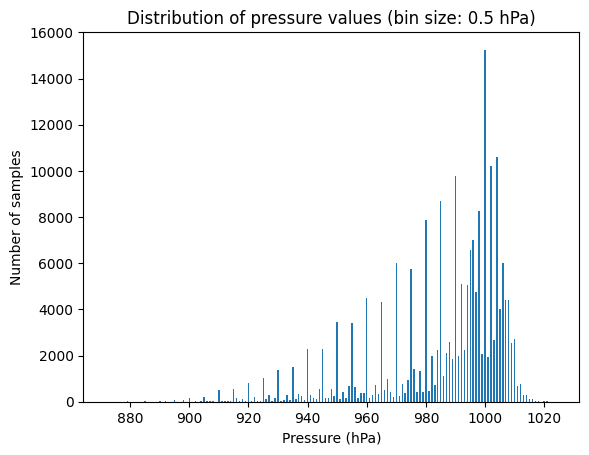

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/ERA5/TC_track_filtered_1980_00_06_12_18.csv", dtype="string", na_filter=False)
pres_cols = [col for col in df.columns if "_PRES" in col and "PRES_" not in col and col!="WMO_PRES"]
df = df[pres_cols]
df.replace(" ", np.nan, inplace=True)
df.dropna(axis=0, how='all', inplace=True)
df = df.astype(float)
a = []
for col in pres_cols:
    a.extend([val for val in df[col] if str(val)!=str(np.nan)])
a = np.array(a)

r = 0.5
arr = np.round(np.arange(a.min()-r/2, a.max()+r, r), 2)
counts, bins = np.histogram(a, bins=arr)
h = plt.hist(bins[:-1], bins=bins, density=False, weights=counts)
plt.title(f"Distribution of pressure values (bin size: {r} hPa)")
plt.xlabel("Pressure (hPa)")
plt.ylabel("Number of samples")
plt.savefig(f"/users/lpoulain/louis/TCBench_0.1/pressure_hist_r_{r}.png", bbox_inches="tight")


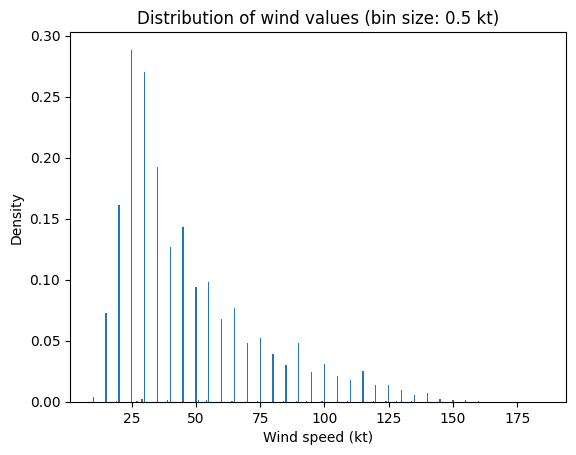

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/ERA5/TC_track_filtered_1980_00_06_12_18.csv", dtype="string", na_filter=False)
df = df["USA_WIND"]
df.replace(" ", np.nan, inplace=True)
df.dropna(axis=0, how='all', inplace=True)
df = df.astype(float)
a = []
a.extend([val for val in df if str(val)!=str(np.nan)])

r = 0.5
a = np.array(a)
arr = np.arange(a.min()-r/2, a.max()+r, r)
plt.hist(a, bins=arr, density=False)
plt.title(f"Distribution of wind values (bin size: {r} kt)")
plt.xlabel("Wind speed (kt)")
plt.ylabel("Number of samples")
plt.savefig(f"/users/lpoulain/louis/TCBench_0.1/wind_hist_r_{r}.png", bbox_inches="tight")

In [11]:
def MySquaredError(x, y):
    return ((np.abs(x-y)-2.5*0.514444) ** 2) * (np.abs(x-y) > 2.5*0.514444)
    #return (x-y-2.5*0.51444) ** 2 * (abs(x-y)-2.5*0.51444 > 0)

import numpy as np

In [13]:
a = np.array([[1,2,3],
              [4,5,6],
              [7,8,9]])
b = np.array([[3,2,1],
              [6,5,4],
              [9,8,7]])
MySquaredError(a, b)

array([[0.50963893, 0.        , 0.50963893],
       [0.50963893, 0.        , 0.50963893],
       [0.50963893, 0.        , 0.50963893]])

In [3]:
a = "/users/lpoulain/louis/plots/cnn/Figs/Losses/pangu_pres_True_epochs_90_lr_0.01_optim_adam_sched_cosine_annealing_2000_2001_2003_2004_2005_2006_train_losses.npy"
b = "/users/lpoulain/louis/plots/cnn/Figs/Losses/pangu_pres_True_epochs_90_lr_0.01_optim_adam_sched_cosine_annealing_2000_2001_2003_2004_2005_2005_train_losses.npy"
c = "".join([a[i] for i in range(len(a)) if a[i]==b[i]])
c

'/users/lpoulain/louis/plots/cnn/Figs/Losses/pangu_pres_True_epochs_90_lr_0.01_optim_adam_sched_cosine_annealing_2000_2001_2003_2004_2005_200_train_losses.npy'

112760


Text(0.5, 1.0, 'LAT')

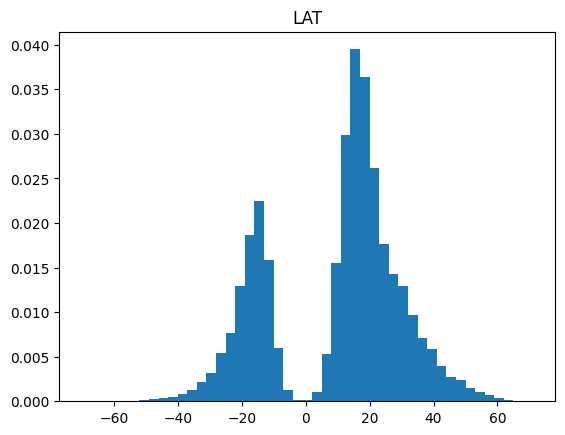

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/ERA5/TC_track_filtered_1980_00_06_12_18.csv", dtype="string", na_filter=False)
col_wnd = ["USA_WIND"]
col_prs = [col for col in df.columns if "_PRES" in col and "PRES_" not in col and col!="WMO_PRES"]
df = df[col_wnd+col_prs+["LAT"]]
df.replace(" ", np.nan, inplace=True)
df.dropna(axis=0, how='all', inplace=True)
df = df.astype(float)
a = []
a.extend([df.loc[i, "LAT"] for i in df.index if str(df.loc[i, "LAT"])!=str(np.nan) and str(df.loc[i, col_wnd])!=str(np.nan)\
            and False in [str(df.loc[i, col])==str(np.nan) for col in col_prs]])
a = np.array(a)
print(len(a))
r = 3
#a = np.array(sorted(list(set(a))))
arr = np.arange(a.min()-r/2, a.max()+r, r)
_ = plt.hist(a, bins=arr, density=True)
plt.title("LAT")

In [1]:
1.82580008e+01

18.2580008

112760


Text(0.5, 1.0, 'LON')

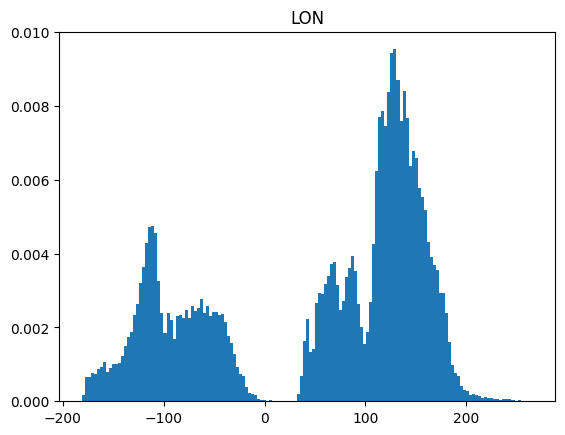

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/ERA5/TC_track_filtered_1980_00_06_12_18.csv", dtype="string", na_filter=False)
col_wnd = ["USA_WIND"]
col_prs = [col for col in df.columns if "_PRES" in col and "PRES_" not in col and col!="WMO_PRES"]
df = df[col_wnd+col_prs+["LON"]]
df.replace(" ", np.nan, inplace=True)
df.dropna(axis=0, how='all', inplace=True)
df = df.astype(float)
a = []
a.extend([df.loc[i, "LON"] for i in df.index if str(df.loc[i, "LON"])!=str(np.nan) and str(df.loc[i, col_wnd])!=str(np.nan)\
            and False in [str(df.loc[i, col])==str(np.nan) for col in col_prs]])
a = np.array(a)
print(len(a))
r = 3
#a = np.array(sorted(list(set(a))))
arr = np.arange(a.min()-r/2, a.max()+r, r)
_ = plt.hist(a, bins=arr, density=True)
plt.title("LON")

Text(0.5, 1.0, 'LON')

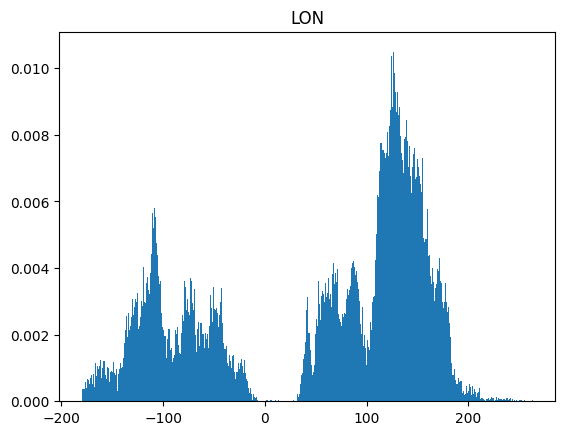

In [24]:
r = 3
#a = np.array(sorted(list(set(a))))
arr = np.arange(a.min()-r/2, a.max()+r, r)
_ = plt.hist(a, bins=arr, density=True)
plt.title("LON")

In [12]:
import pandas as pd
import numpy as np
df = pd.read_csv("/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/ERA5/TC_track_filtered_1980_00_06_12_18.csv", dtype="string", na_filter=False)

wind_col = "USA_WIND"
pres = True
pres_cols = [col for col in df.columns if '_PRES' in col and "PRES_" not in col and col!="WMO_PRES"]
print(pres_cols)
pres_columns = set()
basin_subbasins = {}
basin_agencies = {}
tc_ids = df[df["SEASON"].astype(int).isin([2000,2001,2002,2003,2004,2005,2006,2007,2008])]["SID"].unique()
for tc_id in tc_ids:
    tmp_df = df[df["SID"]==tc_id].loc[1:] # we never predict the start of the TC
    idxs = [idx for idx in tmp_df.index if tmp_df.loc[idx, wind_col]!=" "]
    if len(idxs)==0:
        continue
    if pres:
        key = lambda x: np.count_nonzero(tmp_df[x].values.astype("string")!=" ")
        pres_col = sorted(pres_cols, key=key)[-1] # the one with the highest number of values reported
        idxs = [idx for idx in idxs if tmp_df.loc[idx, pres_col]!=" "] # remove rows with missing values
        if len(idxs)==0:
            continue
        pres_columns.add(pres_col)
    
    basin, subbasin = tmp_df.loc[idxs[0], "BASIN"], tmp_df.loc[idxs[0], "SUBBASIN"]
    if basin not in basin_subbasins.keys():
        basin_subbasins[basin] = set()
    basin_subbasins[basin].add(subbasin)
    
    if basin not in basin_agencies.keys():
        basin_agencies[basin] = set()
    basin_agencies[basin].add(pres_col)
    
print(pres_columns)
print(basin_subbasins)
print(basin_agencies)

['USA_PRES', 'TOKYO_PRES', 'CMA_PRES', 'HKO_PRES', 'NEWDELHI_PRES', 'REUNION_PRES', 'BOM_PRES', 'NADI_PRES', 'WELLINGTON_PRES', 'DS824_PRES', 'TD9636_PRES', 'TD9635_PRES', 'NEUMANN_PRES', 'MLC_PRES']
{'TOKYO_PRES', 'NEWDELHI_PRES', 'WELLINGTON_PRES', 'CMA_PRES', 'USA_PRES', 'HKO_PRES', 'NADI_PRES', 'REUNION_PRES', 'BOM_PRES'}
{'SI': {'MM', 'WA'}, 'SP': {'MM', 'EA'}, 'WP': {'MM'}, 'EP': {'MM', 'CP'}, 'NA': {'GM', 'NA', 'CS'}, 'NI': {'AS', 'BB'}, 'SA': {'MM'}}


In [1]:
import pandas as pd

df = pd.read_csv("/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/ERA5/TC_track_filtered_1980_00_06_12_18.csv", dtype="string", na_filter=False)

def get_ibtracs_data(df, seasons=[], pres=True):
    
    if not isinstance(seasons, list):
        seasons = [seasons]
        
    df = df[df["SEASON"].isin([str(season) for season in seasons])]
    
    tc_ids = df["SID"].unique()
    all_idxs = []
    
    wind_col = "USA_WIND"
    pres_cols = [col for col in df.columns if "_PRES" in col and "PRES_" not in col and col!="WMO_PRES"]
    pres_columns = {}
    for tc_id in tc_ids:
        tmp_df = df[df["SID"]==tc_id].iloc[1:] # we never predict the start of the TC
        idxs = [idx for idx in tmp_df.index if tmp_df.loc[idx, wind_col]!=" "]
        
        if pres:
            key = lambda x: np.count_nonzero(tmp_df[x].values.astype("string")!=" ")
            pres_col = sorted(pres_cols, key=key)[-1] # the one with the highest number of values reported
            idxs = [idx for idx in idxs if tmp_df.loc[idx, pres_col]!=" "] # remove rows with missing values
        
        all_idxs.append(df[df["SID"]==tc_id].index[0])
        all_idxs.extend(idxs)

    return df.loc[all_idxs]

In [4]:
import numpy as np
import sys


for s in [2000,2001,2002,2003,2004,2005,2006,2007]:
    df_pres = get_ibtracs_data(df, seasons=[s], pres=True)
    df_no_pres = get_ibtracs_data(df, seasons=[s], pres=False)
    
    tcs_pres = df_pres["SID"].unique()
    tcs_no_pres = df_no_pres["SID"].unique()
    
    
    lat_diff_pres, lat_diff_no_pres, lon_diff_pres, lon_diff_no_pres = [], [], [], []
    
    for tc_id in tcs_pres:
        tmp_df_pres = df_pres[df_pres["SID"]==tc_id]
        
        for i, idx in enumerate(tmp_df_pres.index):
            if i!=len(tmp_df_pres.index)-1:
                lat1 = float(tmp_df_pres.loc[idx, "LAT"])
                lon1 = float(tmp_df_pres.loc[idx, "LON"])
                if lon1<0:
                    lon1 += 360
                for other_idx in tmp_df_pres.index[i+1:]:
                    lat2 = float(tmp_df_pres.loc[other_idx, "LAT"])
                    lat_diff_pres.append(lat2-lat1)
                    lon2 = float(tmp_df_pres.loc[other_idx, "LON"])
                    if lon2<0:
                        lon2 += 360
                    lon_diff_pres.append(lon2-lon1)
    
    for tc_id in tcs_no_pres:
        tmp_df_no_pres = df_no_pres[df_no_pres["SID"]==tc_id]
        for i, idx in enumerate(tmp_df_no_pres.index):
            lat1 = float(tmp_df_no_pres.loc[idx, "LAT"])
            lon1 = float(tmp_df_no_pres.loc[idx, "LON"])
            if lon1<0:
                lon1 += 360
            if i!=len(tmp_df_no_pres.index)-1:
                for other_idx in tmp_df_no_pres.index[i+1:]:
                    lat2 = float(tmp_df_no_pres.loc[other_idx, "LAT"])
                    lat_diff_no_pres.append(lat2-lat1)
                    lon2 = float(tmp_df_no_pres.loc[other_idx, "LON"])
                    if lon2<0:
                        lon2 += 360
                    lon_diff_no_pres.append(lon2-lon1)
    
    lat_diff_no_pres, lat_diff_pres, lon_diff_no_pres, lon_diff_pres = np.array(lat_diff_no_pres), np.array(lat_diff_pres), np.array(lon_diff_no_pres), np.array(lon_diff_pres)           
    np.save(f"/scratch/lpoulain/{s}/lat_diff_mean_p_True.npy", np.mean(lat_diff_pres))
    np.save(f"/scratch/lpoulain/{s}/lat_diff_meanx2_p_True.npy", np.mean(lat_diff_pres**2))
    np.save(f"/scratch/lpoulain/{s}/lon_diff_mean_p_True.npy", np.mean(lon_diff_pres))
    np.save(f"/scratch/lpoulain/{s}/lon_diff_meanx2_p_True.npy", np.mean(lon_diff_pres**2))
    np.save(f"/scratch/lpoulain/{s}/lat_diff_mean_p_False.npy", np.mean(lat_diff_no_pres))
    np.save(f"/scratch/lpoulain/{s}/lat_diff_meanx2_p_False.npy", np.mean(lat_diff_no_pres**2))
    np.save(f"/scratch/lpoulain/{s}/lon_diff_mean_p_False.npy", np.mean(lon_diff_no_pres))
    np.save(f"/scratch/lpoulain/{s}/lon_diff_meanx2_p_False.npy", np.mean(lon_diff_no_pres**2))
    print(s)
    print(len(lat_diff_pres))
    print(len(lat_diff_no_pres))
    print('\n')
            
            

2000
39082
46620
2001
33078
36623
2002
39724
41296
2003
52532
53617
2004
56814
58405
2005
49610
50519
2006
46047
46605
2007
34028
34343


In [20]:
import pickle
from utils.main_utils import flatten
season = 2005
basin = "NA"
model_names = ["graphcast", "pangu"]
lead_times = [6,24,48]


for lead_time in lead_times:
    print(lead_time,'h')
    for model in model_names:
        print(model)
        paths = ["/users/lpoulain/louis/plots/xgboost/" + f"Data/{season}/statistics_{model}_{lead_time}_{season}_{basin}_{x}.pkl" for x in ["wnd", "pres"]]
        for p in paths:
            with open(p, "rb") as fi:
                data = pickle.load(fi)
            print(min(np.concatenate([v for v in data['q1']])), max(np.concatenate([v for v in data['q3']])),
                  max(np.concatenate([v for v in data['max']])), min(np.concatenate([v for v in data['min']])))

6 h
graphcast
1.1483643539333286 10.444398423987328 29.688513097381698 0.0002526796050570969
100428.6953125 102532.21875 104383.3203125 93888.3828125
pangu
1.5065604473394187 8.497353959052939 27.633309424321983 0.00010541082172374646
98979.5546875 102867.28125 104310.3984375 94779.0625
24 h
graphcast
0.9469327109256315 7.845433396225029 19.20763549381071 3.29550221569433e-05
100223.078125 102419.65625 104607.171875 95243.5234375
pangu
1.7283656975688337 9.295865438572337 25.552369914346933 0.0002395877678095106
100171.453125 102595.921875 103968.0625 94704.1875
48 h
graphcast
1.0713445277368967 10.105230806826478 32.30581059233607 0.0003682905527351266
100063.9453125 102258.640625 104253.84375 97072.25
pangu
1.4501595784193564 9.818175265453226 26.292571997932487 2.2531470090380967e-05
100544.5234375 102623.65625 104270.7890625 95496.8203125


In [25]:
import xarray as xr
import glob

list_ = glob.glob("/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/graphcast/*2000-08-04*2000217N12260_small.nc")
print(len(list_), list_)
xr.open_dataset(list_[4])

11 ['/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/graphcast/graphcast_2000-08-04T18_to_2000-08-05T06_ldt_12_2000217N12260_small.nc', '/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/graphcast/graphcast_2000-08-04T06_to_2000-08-11T00_ldt_162_2000217N12260_small.nc', '/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/graphcast/graphcast_2000-08-04T18_to_2000-08-11T00_ldt_150_2000217N12260_small.nc', '/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/graphcast/graphcast_2000-08-04T06_to_2000-08-05T06_ldt_24_2000217N12260_small.nc', '/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/graphcast/graphcast_2000-08-04T00_to_2000-08-11T00_ldt_168_2000217N12260_small.nc', '/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/graphcast/graphcast_2000-08-04T00_to_2000-08-05T06_ldt_30_2000217N12260_small.nc', '/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/graphcast/graphcast_2000-08-04T12_to_2000-08-05T06_ldt_18_2000217N12260_small.nc',

<xarray.Dataset>
Dimensions:        (time: 28, lat: 241, lon: 241, isobaricInhPa: 13)
Coordinates:
  * time           (time) datetime64[ns] 2000-08-04T06:00:00 ... 2000-08-11
  * lon            (lon) float64 230.0 230.2 230.5 230.8 ... 289.5 289.8 290.0
  * lat            (lat) float64 -18.0 -17.75 -17.5 -17.25 ... 41.5 41.75 42.0
  * isobaricInhPa  (isobaricInhPa) float64 50.0 100.0 150.0 ... 925.0 1e+03
Data variables:
    u10            (time, lat, lon) float32 ...
    v10            (time, lat, lon) float32 ...
    t2m            (time, lat, lon) float32 ...
    z              (time, isobaricInhPa, lat, lon) float32 ...
    msl            (time, lat, lon) float32 ...
    q              (time, isobaricInhPa, lat, lon) float32 ...
    t              (time, isobaricInhPa, lat, lon) float32 ...
    tp             (time, lat, lon) float32 ...
    u              (time, isobaricInhPa, lat, lon) float32 ...
    v              (time, isobaricInhPa, lat, lon) float32 ...
    w              (time, isobaricInhPa, lat, lon) float32 ...

In [4]:
import numpy as np

r = 3 # this is only for visualisation purposes
bins_lat = np.arange(-90-r/2, 90+r, r)
bins_lon = np.arange(-r/2, 360+r, r)
bins_lat.shape, bins_lon.shape

((62,), (122,))

In [ ]:
from utils.params_writers import write_params_for_tc
import pandas as pd

df = pd.read_csv("/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/ERA5/TC_track_filtered_1980_00_06_12_18.csv", dtype="string", na_filter=False)
sid = "2008278N13261"

write_params_for_tc(output_path="/users/lpoulain/louis/TCBench_0.1/slurms/", df=df, TC_id=sid, season="2008", step=6, max_lead=168, debug=False)


In [3]:
import pandas as pd

df_path="/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/ERA5/TC_track_filtered_1980_00_06_12_18.csv"
df = pd.read_csv(df_path, dtype="string", na_filter=False)

'1-'

In [11]:
import numpy as np

train_losses = [0.84309031, 0.82593251, 0.82642886, 0.81233637, 0.8179785,  0.80489257,
 0.79802832 ,0.7805599  ,0.77239827 ,0.76939895 ,0.76170968 ,0.74858568,
 0.73564127 ,0.72691922 ,0.71749272 ,0.70778676 ,0.69847155 ,0.69006142,
 0.68209862 ,0.67420334 ,0.66638177 ,0.65919139 ,0.65319025 ,0.64682265,
 0.64105632 ,0.63620245 ,0.63184453 ,0.62813186 ,0.62578254, 0.62431936]

val_losses = [0.81152571, 0.78052742, 0.76628072, 0.78542137, 0.76674472, 0.75864365,
 0.75183754 ,0.73394688 ,0.73576208 ,0.73511335 ,0.71075095 ,0.69757211,
 0.69180279 ,0.68784795 ,0.6798727  ,0.67055984 ,0.67041092 ,0.67018087,
 0.6704051  ,0.66518139 ,0.659707   ,0.65184783 ,0.64450087 ,0.63774413,
 0.63080652 ,0.62602127 ,0.62282286 ,0.62065944 ,0.61991712 ,0.61976746]


model_name = 'graphcast'
pres = True
epochs = 30
learning_rate = 0.01
train_seasons = ['2000', '2003', '2002', '2007', '2006', '2004']
val_seasons = ['2001', '2005']
crps = False
optim = 'adam'
sched = 'cosine_annealing'
save_path = "/users/lpoulain/louis/plots/cnn"
train_save_name = f"{save_path}/Figs/Losses/{model_name}_pres_{pres}_epochs_{epochs}_lr_{learning_rate}_optim_{optim}_sched_{sched}"\
                    + f"_{'_'.join(sorted(train_seasons))}_train_losses{'_crps' if crps else ''}.npy"
val_save_name = f"{save_path}/Figs/Losses/{model_name}_pres_{pres}_epochs_{epochs}_lr_{learning_rate}_optim_{optim}_sched_{sched}"\
                    + f"_{'_'.join(sorted(train_seasons))}_val_losses{'_crps' if crps else ''}.npy"

np.save(train_save_name, train_losses)
np.save(val_save_name, val_losses)

In [13]:
np.concatenate([np.array([1,2,3,4,5,6]), np.array([7,8,9,10,11,12])])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [4]:
from models.cnn_blocks import CNN4PP
from torchsummary import summary

deterministic = True
m = CNN4PP(in_channels=2, out_channels=8, kernel_size=7, stride=1, padding=1, bias=True, deterministic=deterministic)
summary(m, (2,241,241))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                    [-1, 8]              32
         LeakyReLU-2                    [-1, 8]               0
         LeakyReLU-3                    [-1, 8]               0
            Linear-4                    [-1, 8]              72
         LeakyReLU-5                    [-1, 8]               0
         LeakyReLU-6                    [-1, 8]               0
            Linear-7                    [-1, 4]              36
        MLP4coords-8                    [-1, 4]               0
            Conv2d-9          [-1, 8, 237, 237]             792
        LeakyReLU-10          [-1, 8, 237, 237]               0
        LeakyReLU-11          [-1, 8, 237, 237]               0
        LeakyReLU-12          [-1, 8, 237, 237]               0
        LeakyReLU-13          [-1, 8, 237, 237]               0
      BatchNorm2d-14          [-1, 8, 2

In [3]:
m.print_()

Shapes:

(2, 241, 241)
(8, 118, 118)
(16, 57, 57)
(32, 26, 26)
(1, 11, 11)
